In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 读取Excel文件
file_path = 'data\附件1-白酒样本品评打分.xlsx'

# 查看Excel文件的所有sheet
excel_file = pd.ExcelFile(file_path)
print("Excel file sheets:")
for i, sheet in enumerate(excel_file.sheet_names, 1):
    print(f"{i}. {sheet}")

Excel file sheets:
1. A组白酒品尝评分
2. B组白酒品尝评分


In [17]:
# 读取两个工作表的数据
sheet_A = pd.read_excel(file_path, sheet_name='A组白酒品尝评分')
sheet_B = pd.read_excel(file_path, sheet_name='B组白酒品尝评分')

#### 计算每个样品 每位评分员的总分

In [18]:
# 处理A组数据，提取每个样品的总分
def process_group_data(df, group_name):
    sample_starts = []
    for i, row in df.iterrows():
        if isinstance(row.iloc[0], str) and row.iloc[0].startswith('白酒样品'):
            sample_starts.append(i)
    
    sample_scores = {}
    
    # 处理每个样品的数据
    for start_idx in sample_starts:
        # 获取样品编号
        sample_name = df.iloc[start_idx, 0]
        
        score_start = start_idx + 2  # 跳过标题行和"分数"行
        
        # 提取评分数据
        scores_data = df.iloc[score_start:score_start+10]  
        
        # 计算每个品酒员的总分
        evaluator_scores = []
        for col in range(2, 8):  # 品酒员1-6的列
            total_score = 0
            for row_idx in range(len(scores_data)):
                try:
                    score = pd.to_numeric(scores_data.iloc[row_idx, col], errors='coerce')
                    if not np.isnan(score):
                        total_score += score
                except:
                    pass
            evaluator_scores.append(total_score)
        
        sample_scores[sample_name] = evaluator_scores
    
    return sample_scores

# 处理A组和B组数据
a_scores = process_group_data(sheet_A, 'A')
b_scores = process_group_data(sheet_B, 'B')

print("A Group Sample Scores:")
for sample, scores in list(a_scores.items())[:16]:
    print(f"{sample}: {scores}")

print("\nB Group Sample Scores:")
for sample, scores in list(b_scores.items())[:16]:
    print(f"{sample}: {scores}")

A Group Sample Scores:
白酒样品1: [63, 65, 66, 66, 65, 66]
白酒样品2: [71, 69, 73, 69, 68, 70]
白酒样品3: [79, 78, 78, 76, 80, 81]
白酒样品4: [77, 71, 71, 74, 69, 74]
白酒样品5: [86, 87, 89, 89, 87, 85]
白酒样品6: [77, 78, 75, 76, 73, 76]
白酒样品7: [88, 85, 86, 86, 84, 81]
白酒样品8: [75, 75, 70, 71, 73, 70]
白酒样品9: [79, 83, 80, 77, 80, 81]
白酒样品10: [86, 84, 83, 84, 81, 85]
白酒样品11: [88, 87, 85, 82, 87, 81]
白酒样品12: [62, 67, 67, 61, 63, 61]
白酒样品13: [78, 76, 75, 72, 73, 70]
白酒样品14: [69, 67, 66, 62, 67, 68]
白酒样品15: [67, 70, 64, 66, 69, 64]
白酒样品16: [63, 63, 61, 65, 62, 57]

B Group Sample Scores:
白酒样品1: [58, 63, 62, 70, 63, 73]
白酒样品2: [67, 68, 69, 76, 69, 76]
白酒样品3: [76, 85, 83, 82, 82, 87]
白酒样品4: [72, 75, 77, 82, 72, 81]
白酒样品5: [84, 88, 91, 88, 77, 85]
白酒样品6: [72, 76, 80, 77, 71, 85]
白酒样品7: [86, 86, 91, 89, 88, 92]
白酒样品8: [77, 80, 78, 85, 73, 79]
白酒样品9: [79, 83, 80, 85, 82, 85]
白酒样品10: [83, 81, 82, 80, 79, 89]
白酒样品11: [82, 86, 89, 87, 78, 88]
白酒样品12: [69, 65, 64, 71, 60, 67]
白酒样品13: [71, 76, 79, 77, 69, 72]
白酒样品14: [67, 6

In [19]:
# 计算每个样品的平均分
a_sample_means = {sample: np.mean(scores) for sample, scores in a_scores.items()}
b_sample_means = {sample: np.mean(scores) for sample, scores in b_scores.items()}

# 将数据转换为列表以便分析
a_means_list = list(a_sample_means.values())
b_means_list = list(b_sample_means.values())

In [20]:
# 进行正态性检验
from scipy.stats import shapiro, normaltest, kstest

# Shapiro-Wilk test for normality
shapiro_a = shapiro(a_means_list)
shapiro_b = shapiro(b_means_list)

# D'Agostino's K^2 test for normality
dagostino_a = normaltest(a_means_list)
dagostino_b = normaltest(b_means_list)

print("Normality Tests Results:")
print(f"A Group - Shapiro-Wilk: statistic={shapiro_a.statistic:.4f}, p-value={shapiro_a.pvalue:.4f}")
print(f"B Group - Shapiro-Wilk: statistic={shapiro_b.statistic:.4f}, p-value={shapiro_b.pvalue:.4f}")
print(f"A Group - D'Agostino's K^2: statistic={dagostino_a.statistic:.4f}, p-value={dagostino_a.pvalue:.4f}")
print(f"B Group - D'Agostino's K^2: statistic={dagostino_b.statistic:.4f}, p-value={dagostino_b.pvalue:.4f}")

Normality Tests Results:
A Group - Shapiro-Wilk: statistic=0.9415, p-value=0.3681
B Group - Shapiro-Wilk: statistic=0.9373, p-value=0.3168
A Group - D'Agostino's K^2: statistic=2.7921, p-value=0.2476
B Group - D'Agostino's K^2: statistic=3.3727, p-value=0.1852


#### 检验数据分布

distribution_analysis.png


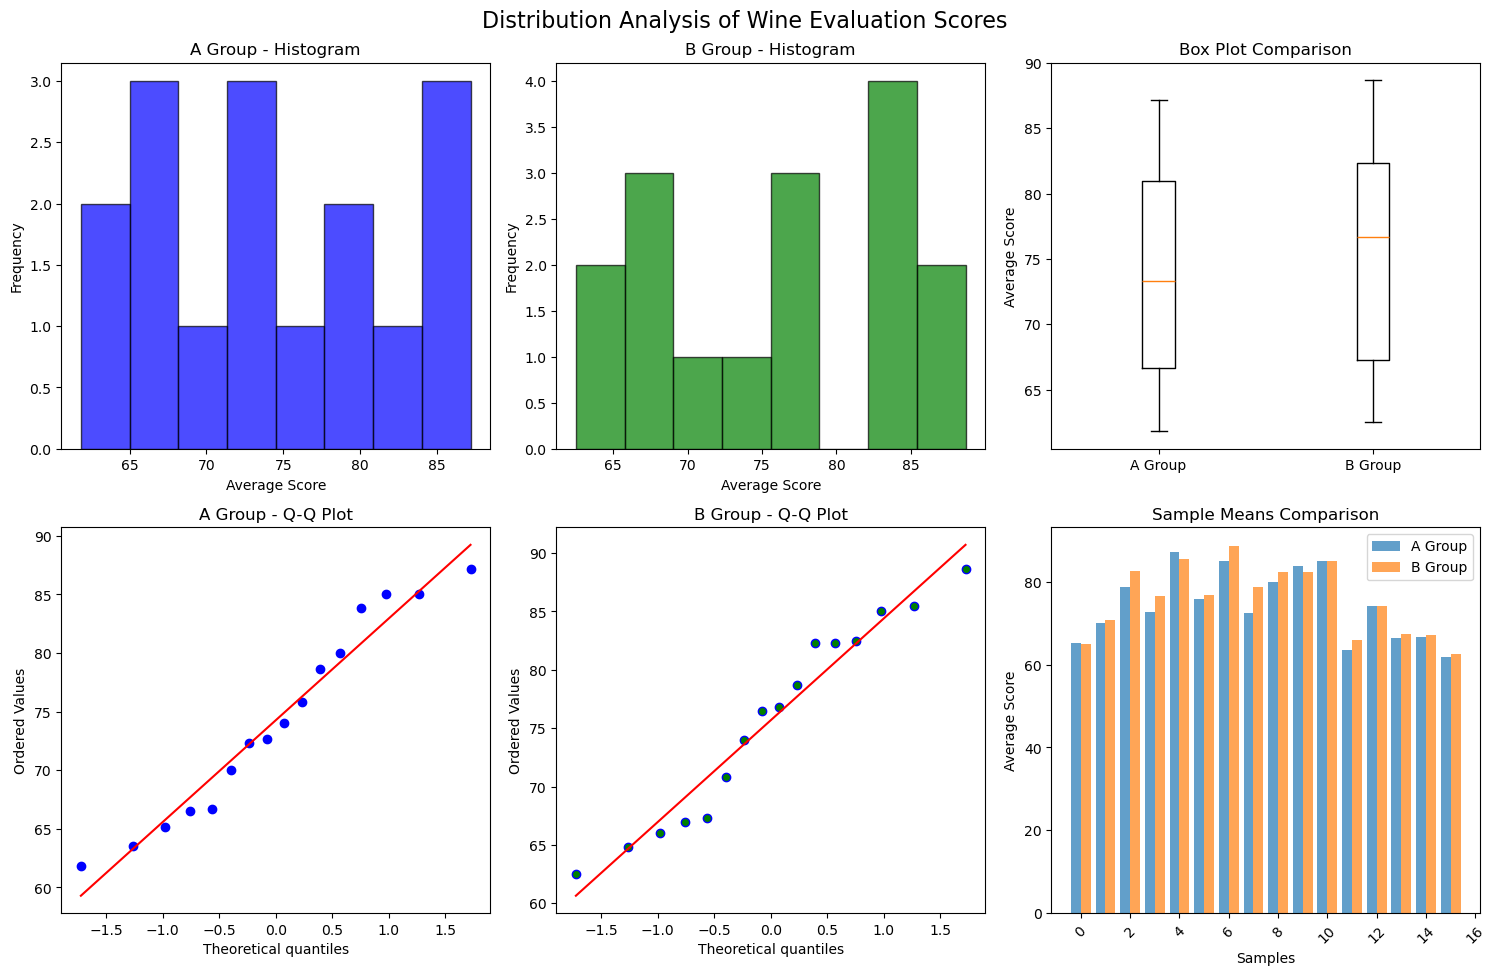

In [21]:
# 创建分布图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Analysis of Wine Evaluation Scores', fontsize=16)

# Histograms
axes[0, 0].hist(a_means_list, bins=8, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('A Group - Histogram')
axes[0, 0].set_xlabel('Average Score')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(b_means_list, bins=8, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('B Group - Histogram')
axes[0, 1].set_xlabel('Average Score')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plots for normality
stats.probplot(a_means_list, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('A Group - Q-Q Plot')
axes[1, 0].get_lines()[0].set_markerfacecolor('blue')
axes[1, 0].get_lines()[1].set_color('red')

stats.probplot(b_means_list, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('B Group - Q-Q Plot')
axes[1, 1].get_lines()[0].set_markerfacecolor('green')
axes[1, 1].get_lines()[1].set_color('red')

# Box plots
axes[0, 2].boxplot([a_means_list, b_means_list], labels=['A Group', 'B Group'])
axes[0, 2].set_title('Box Plot Comparison')
axes[0, 2].set_ylabel('Average Score')

# Bar chart of means
samples = list(a_sample_means.keys())
x_pos = np.arange(len(samples))
axes[1, 2].bar(x_pos-0.2, a_means_list, 0.4, label='A Group', alpha=0.7)
axes[1, 2].bar(x_pos+0.2, b_means_list, 0.4, label='B Group', alpha=0.7)
axes[1, 2].set_title('Sample Means Comparison')
axes[1, 2].set_xlabel('Samples')
axes[1, 2].set_ylabel('Average Score')
axes[1, 2].legend()
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('result\distribution_analysis.png', dpi=300, bbox_inches='tight')
print("distribution_analysis.png")

#### 计算差异性
1.先进行是否满足正态分布的条件（确实可以满足假设的正态分布）

2.再进行是否有显著差异性的检验

In [22]:
# 计算两组评分的差异
differences = [a_means_list[i] - b_means_list[i] for i in range(len(a_means_list))]

# 描述性统计
print("Differences between A and B groups:")
print(f"Mean difference: {np.mean(differences):.4f}")
print(f"Standard deviation: {np.std(differences, ddof=1):.4f}")
print(f"Min difference: {np.min(differences):.4f}")
print(f"Max difference: {np.max(differences):.4f}")

# 正态性检验（对差异）
shapiro_diff = shapiro(differences)
dagostino_diff = normaltest(differences)

print(f"\nDifferences Normality - Shapiro-Wilk: statistic={shapiro_diff.statistic:.4f}, p-value={shapiro_diff.pvalue:.4f}")
print(f"Differences Normality - D'Agostino's K^2: statistic={dagostino_diff.statistic:.4f}, p-value={dagostino_diff.pvalue:.4f}")

Differences between A and B groups:
Mean difference: -1.4167
Standard deviation: 2.1697
Min difference: -6.3333
Max difference: 1.6667

Differences Normality - Shapiro-Wilk: statistic=0.9392, p-value=0.3394
Differences Normality - D'Agostino's K^2: statistic=1.7559, p-value=0.4156


In [23]:
from scipy import stats
t_stat, p_value = stats.ttest_rel(a_means_list, b_means_list)
print(f"t统计量: {t_stat:.4f}, p值: {p_value:.4f}")

t统计量: -2.6118, p值: 0.0196


In [24]:
# 计算每组评酒员的组内一致性 (ICC需要更复杂的计算，我们先计算组内标准差)
# 计算每个样品的组内标准差
a_sample_stds = {sample: np.std(scores, ddof=1) for sample, scores in a_scores.items()}
b_sample_stds = {sample: np.std(scores, ddof=1) for sample, scores in b_scores.items()}

# 计算组内变异系数
a_sample_cv = {sample: (np.std(scores, ddof=1)/np.mean(scores))*100 for sample, scores in a_scores.items()}
b_sample_cv = {sample: (np.std(scores, ddof=1)/np.mean(scores))*100 for sample, scores in b_scores.items()}

# 计算平均组内标准差和变异系数
avg_a_std = np.mean(list(a_sample_stds.values()))
avg_b_std = np.mean(list(b_sample_stds.values()))

avg_a_cv = np.mean(list(a_sample_cv.values()))
avg_b_cv = np.mean(list(b_sample_cv.values()))

print("Within-group Consistency Analysis:")
print(f"A Group - Average within-sample standard deviation: {avg_a_std:.4f}")
print(f"B Group - Average within-sample standard deviation: {avg_b_std:.4f}")
print(f"A Group - Average coefficient of variation (%): {avg_a_cv:.4f}")
print(f"B Group - Average coefficient of variation (%): {avg_b_cv:.4f}")

# 计算组内相关系数ICC的近似值 (简化计算)
# 计算所有评分的总平均值
all_a_scores = [score for scores in a_scores.values() for score in scores]
all_b_scores = [score for scores in b_scores.values() for score in scores]

grand_mean_a = np.mean(all_a_scores)
grand_mean_b = np.mean(all_b_scores)

# 计算组间方差和组内方差
ss_between_a = sum([len(scores) * (np.mean(scores) - grand_mean_a)**2 for scores in a_scores.values()])
ss_within_a = sum([sum((score - np.mean(scores))**2 for score in scores) for scores in a_scores.values()])

ss_between_b = sum([len(scores) * (np.mean(scores) - grand_mean_b)**2 for scores in b_scores.values()])
ss_within_b = sum([sum((score - np.mean(scores))**2 for score in scores) for scores in b_scores.values()])

ms_between_a = ss_between_a / (len(a_scores) - 1)
ms_within_a = ss_within_a / (len(all_a_scores) - len(a_scores))

ms_between_b = ss_between_b / (len(b_scores) - 1)
ms_within_b = ss_within_b / (len(all_b_scores) - len(b_scores))

icc_a = (ms_between_a - ms_within_a) / (ms_between_a + (6-1)*ms_within_a)  # 6 evaluators
icc_b = (ms_between_b - ms_within_b) / (ms_between_b + (6-1)*ms_within_b)

print(f"\nApproximate Intraclass Correlation Coefficient (ICC):")
print(f"A Group ICC: {icc_a:.4f}")
print(f"B Group ICC: {icc_b:.4f}")

Within-group Consistency Analysis:
A Group - Average within-sample standard deviation: 2.2243
B Group - Average within-sample standard deviation: 3.8732
A Group - Average coefficient of variation (%): 3.0476
B Group - Average coefficient of variation (%): 5.1963

Approximate Intraclass Correlation Coefficient (ICC):
A Group ICC: 0.9289
B Group ICC: 0.8113
